In [21]:
!Pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.1 MB/s eta 0:00:0000:0100:01


In [10]:
pip install xgboost


  Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Initialize the XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE found: ", -grid_search.best_score_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
Best MAE found:  0.928660192673556


Mean Absolute Error on Test Set: 0.9328166585810045


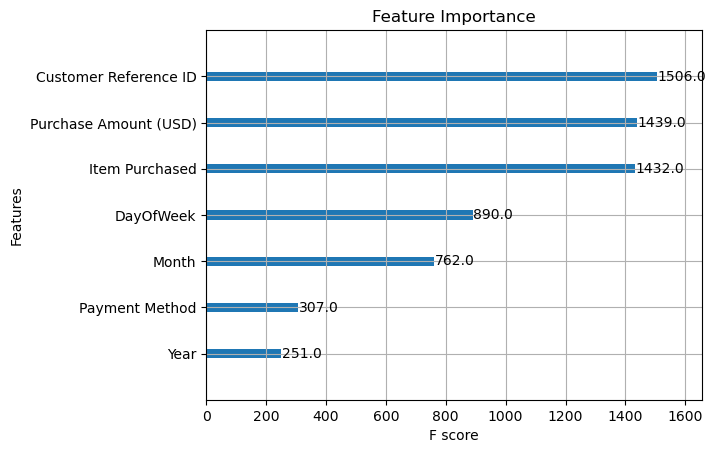

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the XGBRegressor with the best parameters
optimized_model = XGBRegressor(**grid_search.best_params_, objective='reg:squarederror')

# Fit the optimized model on the full training set
optimized_model.fit(X_train, y_train)

# Predict on the test set
y_pred = optimized_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

# Optionally, analyze feature importance or use SHAP
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(optimized_model)
plt.title('Feature Importance')
plt.show()


In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the XGBRegressor with the best parameters
final_model = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=1,
    n_estimators=100,
    subsample=0.5,
    objective='reg:squarederror'
)

# Fit the model on the full training set
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Calculate the mean absolute error on the test set
final_mae = mean_absolute_error(y_test, y_pred)
print(f'Final Mean Absolute Error on Test Set: {final_mae}')


Final Mean Absolute Error on Test Set: 0.9328166585810045
